# Flare 2015/05/05

In [1]:
import numpy as np
# import copy
# import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
# import sunpy
# from scipy.io import readsav
# import cocopy as cp
# from ISPy.io import solarnet
# import sunpy.map
# import astropy.units as u
# from scipy.io import readsav as rs
# from PIL import Image, ImageEnhance
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
# import datetime as dt
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from matplotlib.collections import PolyCollection
import sys
sys.path.append('E:/solar flares/data/2017-09-06')
import use_nessi3 as un

In [2]:
import os

# Specify the path to the folder you want to list files from
folder_path = "E:\solar flares\data\\2015-05-05\\fits\crispex.stokes.2015-05-05-5876.11_57_23.time_corrected.fcube.fits"

maximum = 1000 # to be determined 

def timeframe_to_filename_fits(frame):
    if frame <0 or frame > maximum:
        raise IndexError(f'frame number {frame} is not in [0, {max}).')
    else:
        return folder_path
ttff = timeframe_to_filename_fits



<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_17380\406635582.py:4: SyntaxWarning: invalid escape sequence '\s'
  folder_path = "E:\solar flares\data\\2015-05-05\\fits\crispex.stokes.2015-05-05-5876.11_57_23.time_corrected.fcube.fits"


In [3]:
head0 = f.getheader(ttff(0))
maximum = head0['NAXIS5']
print(maximum)
head0

15


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    5 / number of array dimensions                     
NAXIS1  =                  934                                                  
NAXIS2  =                  970                                                  
NAXIS3  =                   16                                                  
NAXIS4  =                    4                                                  
NAXIS5  =                   15                                                  
EXTEND  =                    T                                                  

In [4]:
with f.open(timeframe_to_filename_fits(0)) as io :
    print(io)
    print(len(io))
    for i, hdl in enumerate(io):
        print(f'\n next hdl number {i} : {hdl}')
        print(np.shape(hdl.data))
        print(hdl.data[0][0])
        

wvl= np.array([-0.660, -0.462,-0.264, -0.198, -0.132, -0.066, 0, 0.066, 0.132, 0.198, 0.264,0.363, 0.495, 0.693, 0.891, 1.254])+5876 

np.save('line_data/wav_sstHe.npy', wvl)

1

 next hdl number 0 : <astropy.io.fits.hdu.image.PrimaryHDU object at 0x00000255F91D86B0>
(15, 4, 16, 970, 934)
[[[218.12218 218.12218 218.12218 ... 218.12218 218.12218 218.12218]
  [218.9856  219.62973 219.58319 ... 218.12218 218.12218 218.12218]
  [210.60301 204.97063 205.42848 ... 218.12218 218.12218 218.12218]
  ...
  [218.12218 218.12218 218.12218 ... 218.12218 218.12218 218.12218]
  [218.12218 218.12218 218.12218 ... 218.12218 218.12218 218.12218]
  [218.12218 218.12218 218.12218 ... 218.12218 218.12218 218.12218]]

 [[208.54726 208.54726 208.54726 ... 208.54726 208.54726 208.54726]
  [209.40976 210.05318 210.00664 ... 208.54726 208.54726 208.54726]
  [201.03629 195.41043 195.86801 ... 208.54726 208.54726 208.54726]
  ...
  [208.54726 208.54726 208.54726 ... 208.54726 208.54726 208.54726]
  [208.54726 208.54726 208.54726 ... 208.54726 208.54726 208.54726]
  [208.54726 208.54726 208.54726 ... 208.54726 208.54726 208.54726]]

 [[210.63542 210.63542 210.63542 ... 210.63542 210.635

In [5]:
begin="11:57"
end="12:01"
reload(un)
time_list = [un.time_hulp(t) for t in np.linspace(un.hulp_time(begin), un.hulp_time(end), 15)]
time_list

['11:57:00',
 '11:57:17',
 '11:57:34',
 '11:57:51',
 '11:58:09',
 '11:58:26',
 '11:58:43',
 '11:59:00',
 '11:59:17',
 '11:59:34',
 '11:59:51',
 '12:00:09',
 '12:00:26',
 '12:00:43',
 '12:01:00']

In [6]:
def datacube(timeframe):
    if timeframe < maximum and timeframe >= 0:
        return f.getdata(ttff(timeframe))[timeframe][0] # TODO: werk hier verder
    else:
        raise IndexError(
            f"Timeframe {timeframe} is negative or exeeds numer of frames {maximum}."
        )

In [7]:
print(np.any(np.isnan(datacube(0)[0,:,:])), np.shape(datacube(0)))
print(f"the maximum attained value in frame 0 is {np.max(datacube(0))} and the 98 percile is {np.percentile(datacube(0), 98)}")
datacube(0)[::3, ::100, ::100]

False (16, 970, 934)
the maximum attained value in frame 0 is 406.3143615722656 and the 98 percile is 274.4837420654297


array([[[218.12218 , 218.12218 , 218.12218 , 218.1209  , 217.82382 ,
         217.0417  , 217.827   , 217.60045 , 199.68135 , 200.08904 ],
        [234.31462 , 140.10771 , 236.45001 , 205.68898 , 217.66711 ,
         209.51564 , 263.748   , 218.70827 , 267.6937  , 256.84616 ],
        [216.57507 , 185.93495 ,  81.24697 , 199.35612 , 231.82974 ,
         222.29651 , 223.68216 , 233.51291 , 234.79155 , 225.64252 ],
        [216.49562 , 190.6153  , 167.70848 , 253.4116  , 225.47035 ,
         203.00221 , 224.35547 , 212.91663 , 210.81314 , 249.86668 ],
        [217.98196 , 235.22852 , 212.32324 , 229.5636  , 154.5778  ,
         237.4072  , 245.73795 , 204.8411  , 253.78299 , 211.19518 ],
        [218.3666  , 211.2414  , 236.31647 , 225.05592 , 169.7892  ,
         249.5055  , 243.69055 , 234.15788 , 191.87187 , 219.29372 ],
        [218.11296 , 211.53957 , 209.28012 , 214.77902 , 240.59477 ,
         247.2704  , 171.09671 , 239.3794  , 233.49646 , 217.9022  ],
        [218.12218 , 222.10

E:\solar flares\data\2015-05-05\fits\crispex.stokes.2015-05-05-5876.11_57_23.time_corrected.fcube.fits
s=(16, 970, 934)
the shape of the data is (15, '??', 16, 970, 934)
the wavelengths are self._wavel = array([5875.34 , 5875.538, 5875.736, 5875.802, 5875.868, 5875.934,
       5876.   , 5876.066, 5876.132, 5876.198, 5876.264, 5876.363,
       5876.495, 5876.693, 5876.891, 5877.254])
defining no boundary for shape (15, '??', 16, 970, 934)

(970, 934) (970, 934)
Boundary
Blue=Outside, yellow=Inside


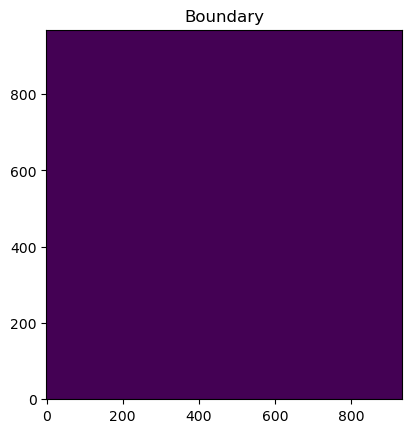

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [8]:
reload(un)

vertices = [(600, 60), (40, 823), (832, 1400), (1280, 770)]

He = un.SST_data_from_multiple_fits_files(timeframe_to_filename_fits,spectfilename='line_data/wav_sstHe.npy', number_of_frames=maximum,
                 time=time_list, name_of_line='He15b', thresh=[0, np.percentile(datacube(0), 99.5)],  boundary_methode='No Boundary', 
                 boundary_arguments = {"error":0.01}, with_stokes=True, with_time=True, alternative_datacube=datacube)

He.boundary


In [9]:
secs = un.get_TIME(He)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} seconds for this line!")
print(f'{He.shape=}')

the mean cadence is 17.142857142857142 seconds for this line!
He.shape=(15, '??', 16, 970, 934)


In [10]:
He.TIME

array([2.        , 2.28333333, 2.56666667, 2.85      , 3.15      ,
       3.43333333, 3.71666667, 4.        , 4.28333333, 4.56666667,
       4.85      , 5.15      , 5.43333333, 5.71666667, 6.        ])

The guessed filters are [[2.1666666666666665, 2.0], [7.5, 2.0], [12.833333333333334, 2.0]]


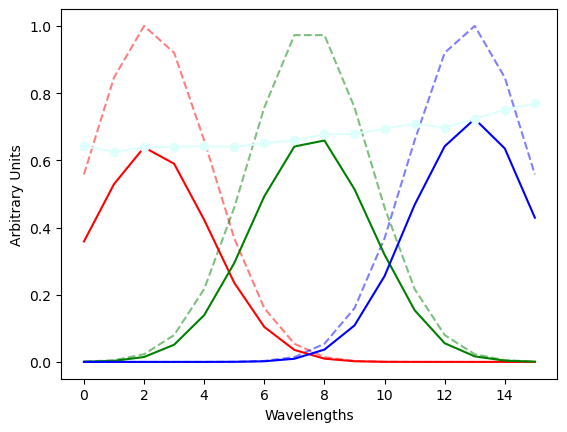

In [11]:
# %matplotlib inline
He.update_filters(None)# [[3,2], [7,2], [11,2]]
He.plot_filt(880,900)
plt.show()

## Calculating the $\mu$ !!!!! 


[-328.5 -271.5 -218.5 -161.5]
does MU contain nan's? False
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.9286716921060977 for timeframe 7
does MU contain nan's? False
[[-328.5 -271.5]
 [-328.5 -271.5]] [[-218.5 -218.5]
 [-161.5 -161.5]]
Coundourplot succesfully saved.


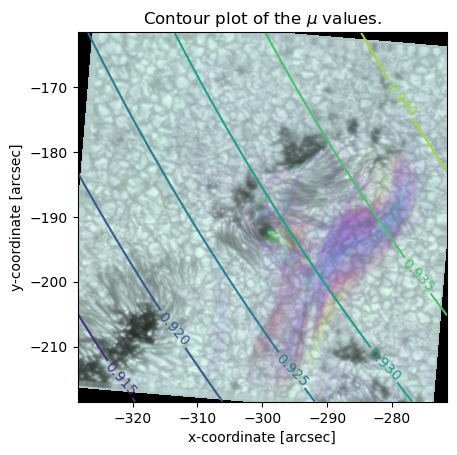

In [12]:
def calculate_mu(x,y, radius=959.63):
    # sourcery skip: inline-immediately-returned-variable
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    mu  = (1-(x**2 + y**2)/radius**2)**0.5
    return mu

sst_data = He

x = -300
y = -190 
width = 57

fxp = np.array([x-width/2, x+width/2])
fyp = np.array([y-width/2, y+width/2])
fxp = np.concatenate((fxp, fyp))
print(fxp)

x = np.linspace(fxp[0], fxp[1], He.shape[4])
y = np.linspace(fyp[0], fyp[1], He.shape[3])

xx, yy = np.meshgrid(x, y)
xx0=xx
yy0=yy

MU = calculate_mu(xx,yy)
print("does MU contain nan's?", np.any(np.isnan(MU)))

sst_data.fov = [xx, yy]

reload(un)

def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    try:
        return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)
    except ValueError:
        x = np.abs(theor_line.sst_mu - mu)
        ind = np.where(x == np.min(x))[0]
        return theor_line.sst_clv[ind]

from matplotlib import transforms

def local_rotation(extent, rad_rot):
    mid = extent2mid(extent)
    x = np.array(mid) 
    R = np.array([[np.cos(rad_rot), -np.sin(rad_rot)], [np.sin(rad_rot), np.cos(rad_rot)]])
    y = np.dot(R, x)
    t = x-y

    return transforms.Affine2D().rotate_deg(rad_rot/np.pi*180).translate(t[0], t[1])

def rotate_mesh_around_average(xx, yy, angle):
  """
  Rotates an xy mesh around its average position.

  Args:
      xx: A 2D NumPy array representing the x-coordinates of the mesh.
      yy: A 2D NumPy array representing the y-coordinates of the mesh.
      angle: The rotation angle in radians. Positive values represent counter-clockwise rotation.

  Returns:
      A tuple of 2D NumPy arrays representing the rotated x and y coordinates (xx_rot, yy_rot).
  """

  # Calculate the average x and y coordinates
  avg_x = np.mean(xx)
  avg_y = np.mean(yy)

  # Shift the mesh to center it around the average
  xx_centered = xx - avg_x
  yy_centered = yy - avg_y

  # Rotate the centered mesh coordinates
  xx_rot = np.cos(angle) * xx_centered -np.sin(angle) * yy_centered  + avg_x
  yy_rot = np.sin(angle) * xx_centered + np.cos(angle) * yy_centered + avg_y

  return xx_rot, yy_rot




def extent_to_grid(extent, shape, invert=False, angle=0):

    x = np.linspace(extent[0], extent[1], shape[4])
    y = np.linspace(extent[2], extent[3], shape[3])
    if invert:
        x = x[::-1]
        y = y[::-1]

    xx, yy = np.meshgrid(x, y)
    if angle != 0:
        xx, yy = rotate_mesh_around_average(xx, yy, angle)

    MU = calculate_mu(xx,yy)
    print("does MU contain nan's?", np.any(np.isnan(MU)))
    return xx, yy, MU

def extent2mid(extent):
    return ((extent[0]+extent[1])/2, (extent[2]+extent[3])/2)

def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None, save=False, save_name="", rotate=0):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.frame_integrated_spect(timeFrame)
        over.ccp_frame(timeFrame, Show=False)
        tr = local_rotation(extent, rotate)
        ax.imshow(Image.fromarray(over.current_ccp), transform=tr + ax.transData, origin='lower', extent=extent)
        K = MU * over.boundary
        av_mu = np.nanmean(K)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    MU_, X, Y = square_full_mu_mesh(X,Y, angle=0, num=200)
    CS = ax.contour(X, Y, MU_)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

        
    if save:
        # Save arrays together
        X, Y, _ = extent_to_grid(extent, (0,0,0,2,2), invert=False, angle=0)
        print(X,Y)
        np.savez(f"line_data/contourdata{save_name}.npz", MU, X[0], Y[:,0], over.current_ccp, rotate)
        print("Coundourplot succesfully saved.")
        
    if over is not None:
        return av_mu
    

def square_full_mu_mesh(X,Y, angle, num=200):
    X = np.array([np.min(X), np.max(X)])
    Y = np.array([np.min(Y), np.max(Y)])
    X,Y = np.meshgrid(X,Y)
    X,Y = rotate_mesh_around_average(X,Y, angle)
    X = np.linspace(np.min(X), np.max(X), num)
    Y = np.linspace(np.min(Y), np.max(Y), num)
    X,Y = np.meshgrid(X,Y)
    MU = calculate_mu(X,Y)
    return MU, X, Y


angle = -59.48 / np.pi
mu = give_mu_contourplot(MU, xx, yy, fxp, over=He, save=True, save_name=He.name_of_line, timeFrame=maximum//2, rotate=angle)
sst_data = He
set_mu(He, mu)
# fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_He.index_mu], theor_line.sst_clv[theor_He.index_mu][0], clv_fit(mu, theor_line)




## Finding a suitable quiet sun patch

<>:38: SyntaxWarning: invalid escape sequence '\C'
<>:38: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_17380\1857871062.py:38: SyntaxWarning: invalid escape sequence '\C'
  fig.savefig(f'plots\Choosing_quiet_sun_patch_He.png')


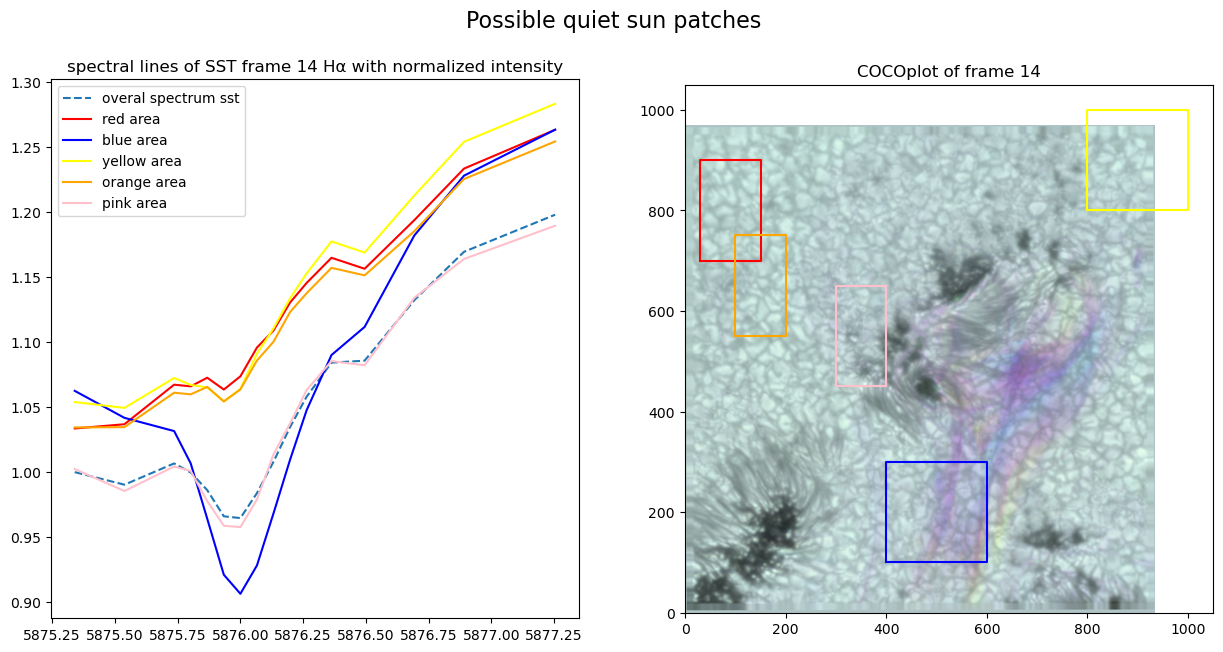

In [13]:
frame=14

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('Possible quiet sun patches', fontsize=16)

He.ccp_frame(frame,Show=False)
# xlim, ylim
X = [[(30,150),(700,900)], [(400,600), (100, 300)], [(800,1000), (800, 1000)],  [(100,200),(550,750)], [(300,400),(450,650)]]
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1 with normalized intensity")
He.frame_integrated_spect(frame)
ax[0].plot(He._wavel, He.av_spect, '--', label='overal spectrum sst')
# ax[0].plot(theor_He.sst_wav + theta[0], theta[2] * theor_He.sst_dc + theta[1], label='saas nessi')
# theta = [ 2.196e-01 , 6.288e-02 , 8.458e-01]
theta = [0,0,1]


ax[1].imshow(He.current_ccp,origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
t=0
for i in X:
    xlim=i[0]
    ylim=i[1]
    if t<len(colors):
        color=colors[t]
    else:
        color = np.array(np.random.choice(range(256), size=3))/255
    t+=1
    ax[0].plot(He._wavel, He.frame_integrated_spect(frame, xlim=xlim, ylim=ylim), color=color, label=str(color)+' area') #
    ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)
ax[0].legend()

# Save the figure
fig.savefig(f'plots\Choosing_quiet_sun_patch_He.png')
plt.show()


### The quiet sun patch

fill in here which color the wanted quiet sun patch had 

In [14]:
color_wanted_patch = 'red'

the edges of the patch are denoted by the xlim: (30, 150) and ylim: (700, 900)


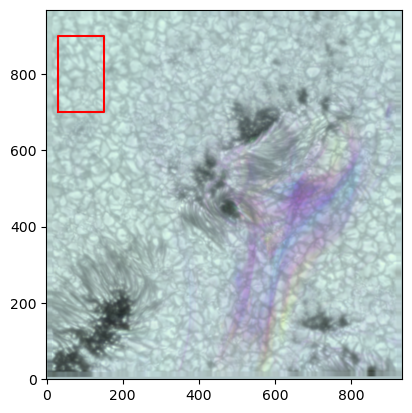

{'frame': 14, 'xlim': (30, 150), 'ylim': (700, 900), 'color': 'red'}

In [15]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

He.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
He.quiet_sun

## The full FOV integrated spectrum over time:

In [16]:
sst_data = He
He.shape

(15, '??', 16, 970, 934)

In [17]:
He.calculate__FOV_spect_over_time()

In [18]:
sst_data.quiet_sun

{'frame': 14, 'xlim': (30, 150), 'ylim': (700, 900), 'color': 'red'}

# Comparing to atlas: fixing quiet sun!

In [19]:
import use_nessi as un1
import data_analysis as da

atlas = f.getdata("E:/solar flares/data/2017-09-06/fits/solar_atlas_V1_405-1065.fits")
atlas_w = np.arange(len(atlas)) * -0.003766534468 + 24700.0858041
aw = 1e8 / atlas_w

lw = sst_data._wavel[0]
rw = sst_data._wavel[-1]

if lw > aw[-1] or rw < aw[0]:
    print(f"The line of sst and atlas do not coincde! SST: min={lw}, max={rw}")
    print(f"and atlas: min={aw[0]}, max={aw[-1]}. The advise is taking a new consistent atlas.")
    raise ValueError("The line of sst and atlas do not coincde.")

llw = np.where(aw > lw-3)[0][0]
lrw = np.where(aw > rw+3)[0][0]

fd = atlas[llw:lrw]
fdw = aw[llw:lrw]

ff = interp1d(fdw, fd, kind='linear', fill_value="extrapolate")
# Use this function to compute the new values
fdd = ff(sst_data._wavel)

sst_wav = sst_data._wavel
quiet_spect = sst_data.quiet_spect


def fit_atlas_to_nessi(aa2, minimum=True, quality=True, initial_values=None):



    l = len(sst_wav)
    data = [sst_wav,  quiet_spect ,np.zeros(l)+0.001,np.zeros(l)+0.001]

    multiplier = 1/0.85

    # theta = [horizontale translatie, verticale translatie, verticale schaalfactor]
    model_atlas = lambda theta : interp1d(fdw , aa2*theta[2] , kind='linear', fill_value="extrapolate")


    # fdw + rv,aa2*multiplier, color='black', lw=2, label='Atlas Convolved'
    # sst_wav, test_si, color='red', label='Full CLV'
    if initial_values is None:
        initial_values=np.array([0, 0, multiplier])

    mini = da.optimalisatie(data, model=model_atlas, beginwaarden=initial_values, fout_model=None, plot=False)
    theta = mini['x']
    da.plot_fit(data, model=model_atlas, theta0=mini['x'], titel="Fitting atlas to nessi ",labelx=" $wavelength [\AA]$",
                labely=" $Intensity$  [arbitrary units]", figname=None , error=False)
    if quality:
        print(mini)
        da.kwaliteit_fit(data, mini)
    sst_data.theta_nessi_to_quiet_sun = theta
    return theta
    


def quiet_spect_atlas_check(show_all=False,initial_values_fit=None):
        # if self.neglect_atlas:
        #     return
        # test_si = quiet_spect

        # #test_si = test_si/np.min(test_si)*np.min(test_si)
        # test_si = test_si/test_si[0]
        # sst_dc = sst_dc/sst_dc[0]
        # fdd = fdd/fdd[0]

        # quiet_spect = test_si


        import ISPy.spec.crisp as c
        dw = 0.07
        ntw = 59
        tw = (np.arange(ntw)-ntw//2)*dw
        # fpife = c.crisp(np.median(sst_wav))
        fc = c.crisp(np.median(sst_wav))
        tr = fc.dual_fpi(tw, erh = -0.022) #6301-2

        tr /= tr.sum()
        inst_prof = np.zeros((len(tr),2))
        inst_prof[:,0] = tw+np.abs(tw.min())
        inst_prof[:,1] = tr

        import ISPy.spec.calib as cb

        aa = cb.convolve_atlas(fdw,fd,inst_prof)
        aa2=aa
        # fit_atlas_to_nessi(quality=show_all, initial_values=initial_values_fit)
        theta  = fit_atlas_to_nessi(aa2,  minimum=True, quality=True, initial_values=initial_values_fit)


        if show_all:
            print(len(fdw))

            plt.plot(fdw,fd, label="Atlas")
            plt.plot(fdw, aa, label="Atlas Convolved")
            plt.legend()
            plt.show()


        ff = interp1d(fdw+theta[0], aa2*theta[2]+theta[1], kind='linear', fill_value="extrapolate")
        # Use this function to compute the new values
        fdd = ff(sst_wav)


        fig = plt.subplots(1, 2, figsize=(15,7))
        plt.subplot(121)
        plt.plot(fdw + theta[0] ,fd*theta[2]+theta[1], color='black', linestyle='--', alpha=0.5, label='Atlas (Reiners et al. 2015)')
        plt.plot(fdw + theta[0],aa2*theta[2]+theta[1], color='black', lw=2, label='Atlas Convolved')
        sst_data.atlas_saas_profile = interp1d(fdw + theta[0], aa2*theta[2]+theta[1])(sst_wav)
        # plt.plot(sst_wav, s, color='blue', label='Disk Center')
        plt.plot(sst_wav, quiet_spect, color='red', label='quiet spec')
        plt.xlabel(r'Wavelength [$\rm\AA$]')
        plt.ylabel('Intensity')
        plt.legend()
        # plt.xlim()

        atlas_convolved = [fdw + theta[0],aa2*theta[2]+theta[1]]

        plt.subplot(122)
        plt.plot(sst_wav, quiet_spect/fdd, label='CLV', color='red')
        # plt.plot(sst_wav, s/fdd, label='DC', color='blue')
        plt.xlabel(r'Wavelength [$\rm\AA$]')
        plt.ylabel('Offset [%]')
        plt.legend()

        # plt.ylim(0.93,1.025)
        plt.show()


<>:50: SyntaxWarning: invalid escape sequence '\A'
<>:50: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_17380\3299507031.py:50: SyntaxWarning: invalid escape sequence '\A'
  da.plot_fit(data, model=model_atlas, theta0=mini['x'], titel="Fitting atlas to nessi ",labelx=" $wavelength [\AA]$",


crisp::read_reflectivity: (RL,RH)[5876.099] = (0.8566098014400254, 0.9266183874810784)


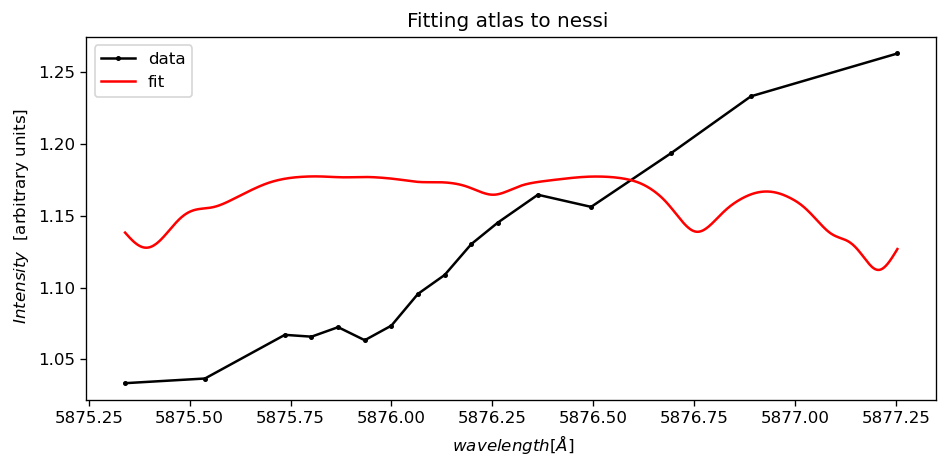

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 348.01979214835535
        x: [ 0.000e+00  0.000e+00  1.176e+00]
      nit: 0
      jac: [ 0.000e+00  0.000e+00  0.000e+00]
 hess_inv: [[1 0 0]
            [0 1 0]
            [0 0 1]]
     nfev: 4
     njev: 1
de p-waarde is  0.013371597702212088 
Chi^2 reduced= 26.77075324218118 
aantal vrijheidgraden= 13 
chi^2= 348.01979214835535
we behouden de fit tot op een betrouwbaarheidsniveau van  0.013371597702212088 
Oftewel verwerp als p-waarde <lpha-niveau 


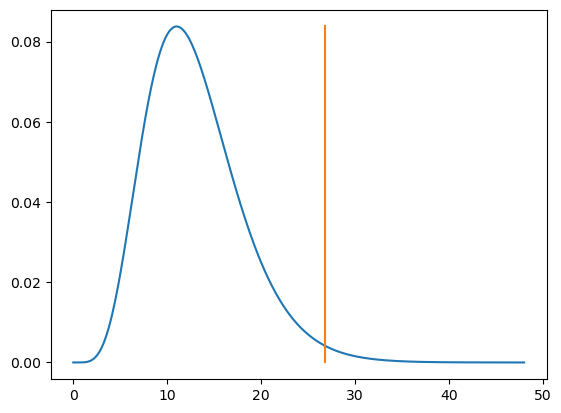

6085


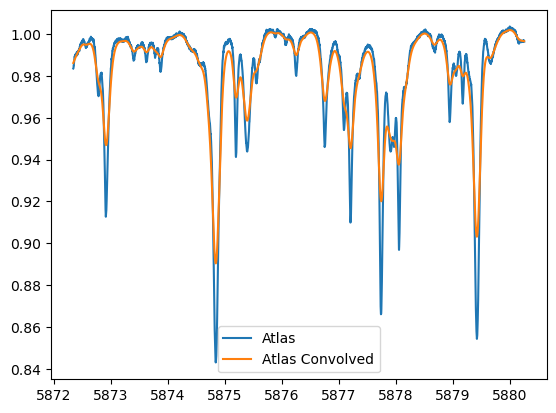

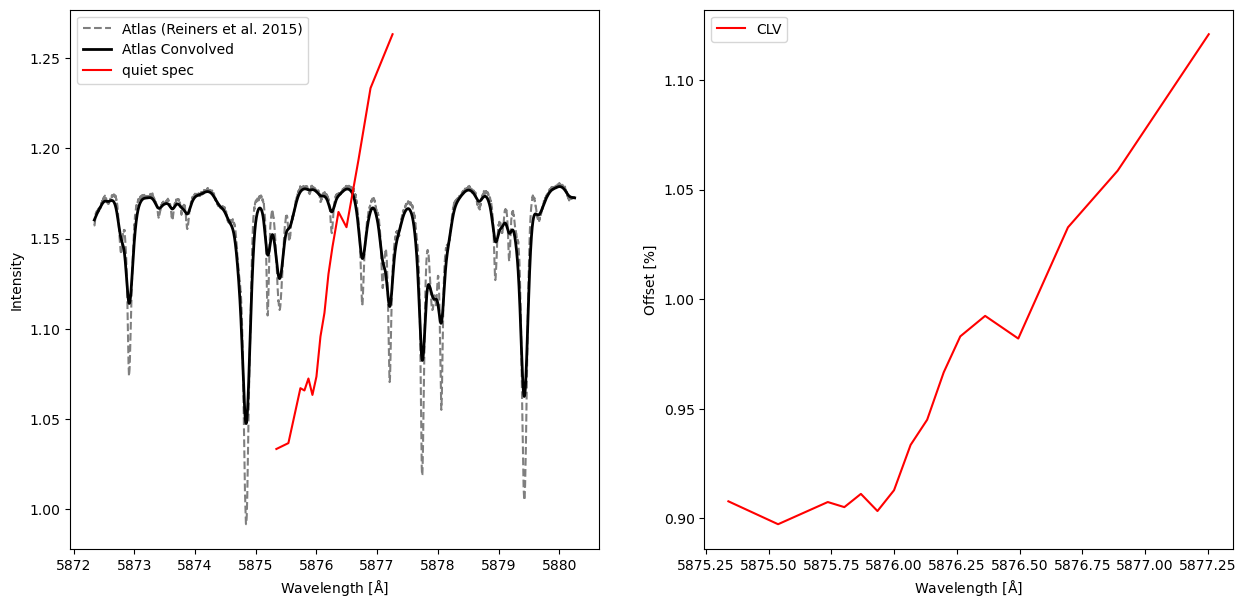

In [20]:
quiet_spect_atlas_check(show_all=True ,initial_values_fit=None)


# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

In [21]:
import use_nessi as un1

The peak occurs at frame [14] at time ['t=12:01:00 UT'].
The SST data runs from t=11:57:00 UT to t=12:01:00 UT.
The areafactor for THIS flare is 0.0011230321924235321 compared to 60**2/np.pi/959.63**2 = 0.0012443569999152702.        
However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.        
Percentage: 90.25%.


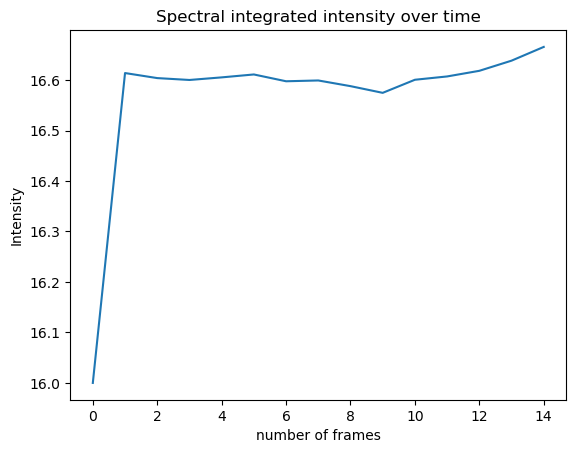

In [22]:
reload(un1)
un1.save_for_further_analysis(He, None)


# Movie Making

[0.         0.         1.17647059]
Frame: 0, 11:57:00, total number of frames: 15 


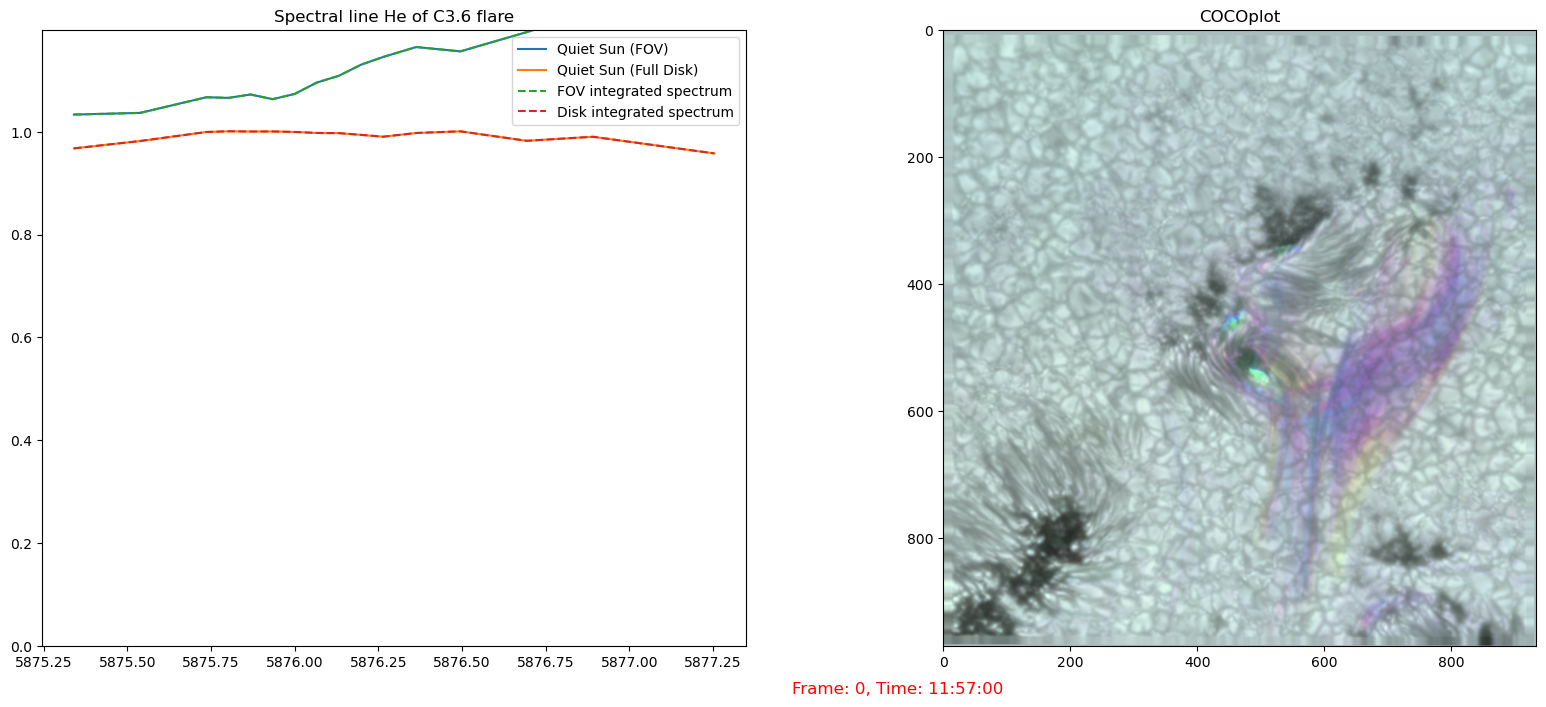

In [23]:
# fill in here all arguments
sst_data = He
name_of_flare = "C3.6"
name_of_line = "He"

reload(un1)
un1.Movie_making(None, sst_data, name_of_flare, name_of_line, step=1, show_boundary=False)